# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия и Петровская Евгения. Вариант №17.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Частотный анализ - это метод исследования частотных свойств нерекурсивных фильтров, используемых для полиномиального сглаживания дискретного сигнала. Он заключается в построении графиков передаточных функций фильтров, которые описывают зависимость выходного сигнала от входного в частотной области. Анализ этих графиков позволяет определить способность фильтра к подавлению определенных частотных компонент и выбрать наиболее подходящий фильтр для конкретной задачи обработки сигнала.

Частотные фильтры работают по алгоритму:

$$ y_k = \sum_{n = -N}^N{}h_nS(k-n)$$

где S - входное воздействие, y – результат фильтрации, h – коэффициенты
фильтра.

Полиномиальное сглаживание дискретного сигнала реализовано методом наименьших квадратов. Применен тип сглаживания в скользящем окне, который для каждой точки сигнала вычисляет значение полинома определенной степени, используя значения соседних точек в заданном окне.

Для достижения хорошего подавления ошибок и сохранения качества сигнала необходимо, чтобы АЧХ фильтра была гладкой и близкой к 1 в полосе пропускания, имела маленькую переходную зону между полосой пропускания и полосой подавления, а также была гладкой и близкой к 0 в полосе подавления.

Порядок фильтра - это количество элементов задержки (полюсов или нулей), которые используются в фильтре. Чем выше порядок фильтра, тем больше его способность подавлять нежелательные частоты, но при этом может возникнуть проблема с искажением сигнала, так как высокий порядок фильтра может привести к фазовым искажениям.Чтобы избежать этого явления, необходимо использовать фильтры низких порядков или методы интерполяции, которые позволяют сгладить границы между участками сигнала, также можно скорректировать коэффициенты фильтра с помощью весовых функций, которые уменьшают вклад коэффициентов более высокого порядка. Данная зависимость порядка фильтра от качества сигнала описана в явлении Гиббса.

Формулы Спенсера - это численные методы, которые используются для приближенного решения обыкновенных дифференциальных уравнений.

15-точечная формула Спенсера используется для решения уравнений второго порядка и имеет следующий вид:

$$ y''(x) ≈ (137*y(x) - 27*y(x-h) + 27*y(x-2h) - 8*y(x-3h) + y(x-4h)) / (60*h^2) $$

где y(x) - значение функции в точке x, h - шаг сетки.

21-точечная формула Спенсера используется для решения уравнений четвертого порядка и имеет следующий вид:

$$ y''''(x) ≈ (751*y(x) - 357*y(x-h) + 47*y(x-2h) - 26*y(x-3h) + 9*y(x-4h) - y(x-5h)) / (240*h^4) $$

где y(x) - значение функции в точке x, h - шаг сетки.




## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1. Вывод формул для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.

На входе $s(t)$ и на выходе $y(t)=A+Bt$ сигналы, МНК на примере 5 точек:

$$F(A,B)=\sum^{2}_{k=-2}(s_k-y_k)^2=\sum^{2}_{k=-2}(s_k-A-Bk)^2 \Rightarrow min$$

Система нормальных уравненией:

$$\begin{cases}5A+0B=\sum^{k=2}_{k=-2}s_k\\0A+10B=\sum^{k=2}_{k=-2}ks_k\end{cases} => $$

$$y_0=A=\frac{1}{5}\sum_{k=-2}^{k=2}s_k=\frac{1}{5}(s_{-2}+s_{-1}+s_0+s_1+s_2)$$

Для n:

$$y_n=\frac{1}{5}\sum_{k=n-2}^{k=n+2}s_k=\frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s_{n+2})$$

Путём преобразований, в том числе с использованием функции Эйлера, получаем:

$$H(\omega)=0.2[1+2cos(\omega)+2cos(2\omega)] = $$
$$= \frac{e^{i\frac{5\omega}{2}}-e^{-i\frac{5\omega}{2}}}{5(e^{i\frac{\omega}{2}}-e^{-i\frac{\omega}{2}})}=\frac{sin(\frac{5\omega}{2})}{5sin(\frac{\omega}{2})}$$

В общем случае при приближении для $2m+1$ точек:

$$H(\omega)=\frac{1}{2m+1}[1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega)] = $$

$$= \frac{sin(\frac{(2m+1)\omega}{2})}{(2m+1)sin(\frac{\omega}{2})}$$

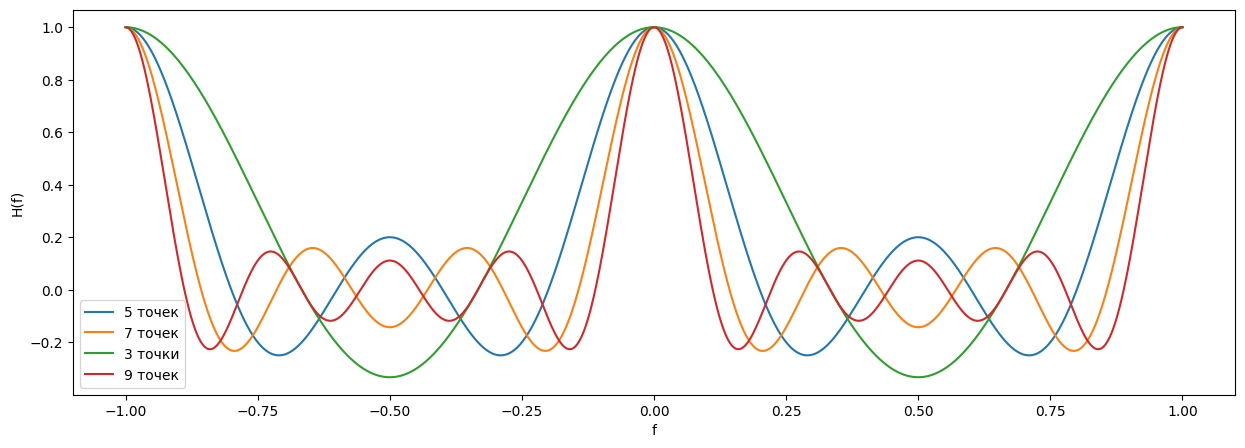

In [17]:
h_task1 = lambda f, m: np.sin(m * np.pi * f) / (m * np.sin(f * np.pi))

t = np.linspace(-1, 1, 2000)

plt.figure(figsize=(15, 5))
plt.plot(t, h_task1(t, 5), label='5 точек')
plt.plot(t, h_task1(t, 7), label='7 точек')
plt.plot(t, h_task1(t, 3), label='3 точки')
plt.plot(t, h_task1(t, 9), label='9 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Графики симметричны относительно нуля. Между пиками амплитут происходят колебания - это явление Гиббса, чем больше точек, тем сильнее крутизна спада, но меньше амплитуда.

### Задание 2. Вывод формул для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам.

При сглаживании полиномом второй степени $y(t)=A+Bt+Ct^2$, МНК по семи точкам:

$$F(A,B,C)=\sum^{3}_{k=-3}(s_k-y_k)^2=\sum^{3}_{k=-3}(s_k-A-Bk-Ck^2)^2 \Rightarrow min$$

A, B и C из системы:


$$\begin{cases}
7A + 0B + 10C = \sum^{k=3}_{k=-3}s_k \\
0A + 28B + 0C = \sum^{k=3}_{k=-3}ks_k \\
28A + 0B + 196C = \sum^{k=3}_{k=-3}k^2s_k
\end{cases}$$

=>

$$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_{n}+6s_{n+1}+3s_{n+2}-2s_{n+3})$$

Получаем отсюда передаточкую функцию:

$$H(\omega)=\frac{1}{21}[7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)]$$

Для 9 точек:

$$y_n = \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_{n}+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$

$$H(\omega)=\frac{1}{231}[59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)]$$

Для 11 точек:

$$y_n=\frac{1}{429}(-36s_{n-5}+9s_{n-4}+44s_{n-3}+69s_{n-2}+84s_{n-1}+89s_{n}+84s_{n+1}+69s_{n+2}+44s_{n+3}+9s_{n+4}-36s_{n+5})$$

$$H(\omega)=\frac{1}{429}[89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)]$$

Для 13 точек:

$$y_n=\frac{1}{143}(-11s_{n-6}+9s_{n-4}+16s_{n-3}+21s_{n-2}+24s_{n-1}+25s_{n}+24s_{n+1}+21s_{n+2}+16s_{n+3}+9s_{n+4}-11s_{n+6})$$

$$H(\omega)=\frac{1}{143}[25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(6\omega)]$$

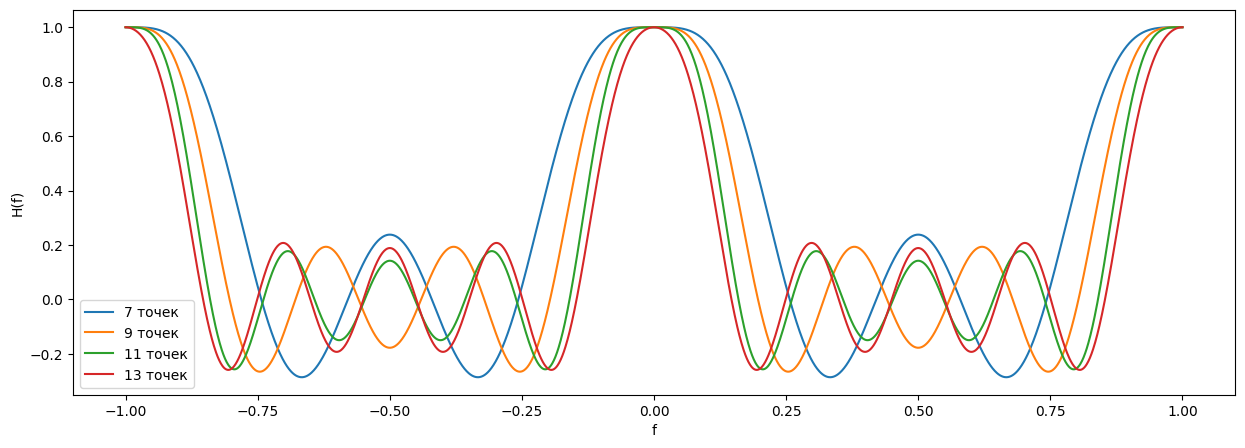

In [14]:
h_task2_7 = lambda f: 1 / 21 * (7 + 12 * np.cos(2*np.pi*f) + 6 * np.cos(4*np.pi*f) - 4 * np.cos(6*np.pi*f))
h_task2_9 = lambda f: 1 / 231 * (59 + 108 * np.cos(2*np.pi*f) + 78 * np.cos(4*np.pi*f) + 28 * np.cos(6*np.pi*f) - 42 * np.cos(8*np.pi*f))
h_task2_11 = lambda f: 1 / 429 * (89 + 168 * np.cos(2*np.pi*f) + 138 * np.cos(4*np.pi*f) + 88 * np.cos(6*np.pi*f) + 18 * np.cos(8*np.pi*f) - 72 * np.cos(10*np.pi*f))
h_task2_13 = lambda f: 1 / 143 * (25 + 48 * np.cos(2*np.pi*f) + 42 * np.cos(4*np.pi*f) + 32 * np.cos(6*np.pi*f) + 18 * np.cos(8*np.pi*f) - 22 * np.cos(10*np.pi*f))

plt.figure(figsize=(15, 5))
plt.plot(t, h_task2_7(t), label='7 точек')
plt.plot(t, h_task2_9(t), label='9 точек')
plt.plot(t, h_task2_11(t), label='11 точек')
plt.plot(t, h_task2_13(t), label='13 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Можно заметить, что чем больше точек при сглаживании, тем выше крутизна графика передаточной функции. Промежуток касания в пике амлитуды возрастает с ростом количества точек, зона пропуска сигнала без искажений шире, чем в прошлом пункте.

### Задание 3. Вывод формул для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам.

При сглаживании полиномом четвертоё степени $y(t)=A+Bt+Ct^2+Dt^3+Et^4$, МНК прямой линией по девяти точкам:

$$F(A,B,C,D,E)=\sum^{4}_{k=-4}(s_k-y_k)^2=\sum^{4}_{k=-4}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2 \Rightarrow min$$

Решаем систему уравнений и получаем, что для 9 точек справедливо:

$$y_n=\frac{1}{429}(15s_{n-4}-55s_{n-3}+30s_{n-2}+135s_{n-1}+179s_{n}+135s_{n+1}+30s_{n+2}-55s_{n+3}+15s_{n+4})$$

$$H(\omega) = \frac{1}{429}\big[179 + 270cos(\omega) + 60cos(2\omega) - 110cos(3\omega) + 30cos(4\omega)\big]$$

Для 11-ти точек:

$$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_{n}+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$

$$H(\omega) = \frac{1}{429}\big[143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)\big]$$
    
Для 13-ти точек:
    
$$y_n=\frac{1}{2431}(110s_{n-6}-198s_{n-5}-135s_{n-4}+110s_{n-3}+390s_{n-2}+600s_{n-1}+677s_{n}+600s_{n+1}+390s_{n+2}+110s_{n+3}-135s_{n+4}-198s_{n+5}+110s_{n+6})$$

$$H(\omega) = \frac{1}{2431}\big[677 + 1200cos(\omega) + 780cos(2\omega) + 220 cos(3\omega) - 270cos(4\omega) - 396cos(5\omega) + 220cos(6\omega)\big]$$

Для 15 точек:

$$y_n=\frac{1}{46189}(2145s_{n-7}-2860s_{n-6}-2937s_{n-5}-165s_{n-4}+3755s_{n-3}+7500s_{n-2}+10125s_{n-1}+11063s_{n}+10125s_{n+1}+7500s_{n+2}+3755s_{n+3}-165s_{n+4}-2937s_{n+5}-2860s_{n+6}+2145s_{n+7})$$

$$H(\omega) = \frac{1}{46189}\big[11063 + 20250cos(\omega) + 15000cos(2\omega) + 7510cos(3\omega) - 330cos(4\omega) - 5874cos(5\omega) - 5720cos(6\omega) + 4290cos(7\omega)\big]$$

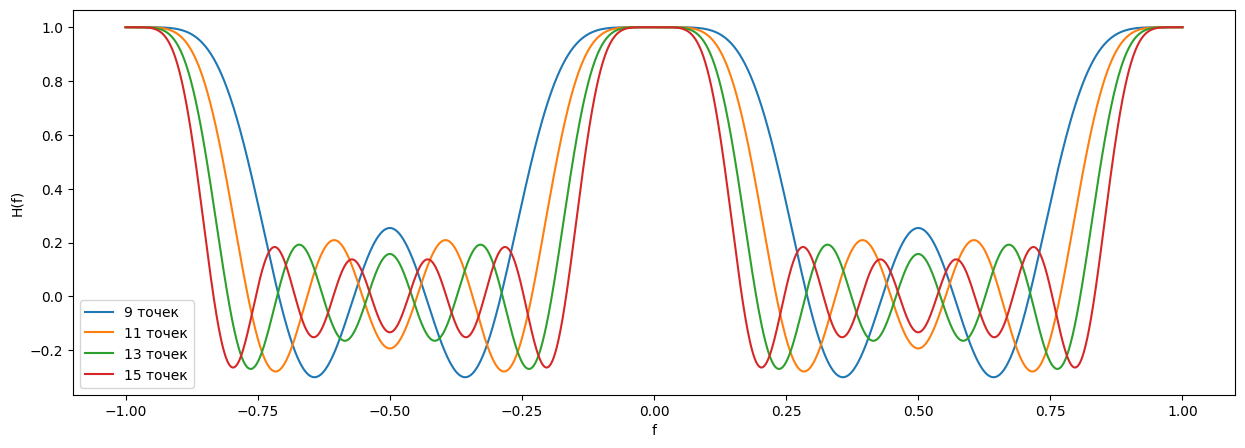

In [15]:
h_task3_9 = lambda f: 1 / 429 * (179 + 270 * np.cos(2*np.pi*f) + 60 * np.cos(4*np.pi*f) - 110 * np.cos(6*np.pi*f) + 30 * np.cos(8*np.pi*f))
h_task3_11 = lambda f: 1 / 429 * (143 + 240 * np.cos(2*np.pi*f) + 120 * np.cos(4*np.pi*f) - 20 * np.cos(6*np.pi*f) - 90 * np.cos(8*np.pi*f) + 36 * np.cos(10*np.pi*f))
h_task3_13 = lambda f: 1 / 2431 * (677 + 1200 * np.cos(2*np.pi*f) + 780 * np.cos(4*np.pi*f) + 220 * np.cos(6*np.pi*f) - 270 * np.cos(8*np.pi*f) - 396 * np.cos(10*np.pi*f) + 220 * np.cos(12*np.pi*f))
h_task3_15 = lambda f: 1 / 46189 * (11063 + 20250 * np.cos(2*np.pi*f) + 15000 * np.cos(4*np.pi*f) + 7510 * np.cos(6*np.pi*f) - 330 * np.cos(8*np.pi*f) - 5874 * np.cos(10*np.pi*f) - 5720 * np.cos(12*np.pi*f) + 4290 * np.cos(14*np.pi*f))

plt.figure(figsize=(15, 5))
plt.plot(t, h_task3_9(t), label='9 точек')
plt.plot(t, h_task3_11(t), label='11 точек')
plt.plot(t, h_task3_13(t), label='13 точек')
plt.plot(t, h_task3_15(t), label='15 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Тенденции из прошлых пунктов сохраняются, увеличение точек => увеличение крутости графика и продолжительнее пик амлитуды.

### Задание 4. Вывод формул для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам.

15 точек:

$$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+6} - 6s_{n+6} - 3s_{n+7})$$

$$H(\omega)=\frac{1}{320}\big[74 + 134cos(\omega)+92cos(2\omega)+42cos(3\omega)+6cos(4\omega)-10cos(5\omega)-12cos(6\omega)-6cos(7\omega)\big]$$

21 точка:
$$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} -s_{n+10})$$

$$H(\omega)=\frac{1}{350}\big[60 + 114cos(\omega)+94cos(2\omega)+66cos(3\omega)+36cos(4\omega)+12cos(5\omega)-4cos(6\omega)-10cos(7\omega)-10cos(8\omega)-6cos(9\omega)-2cos(10\omega)\big]$$

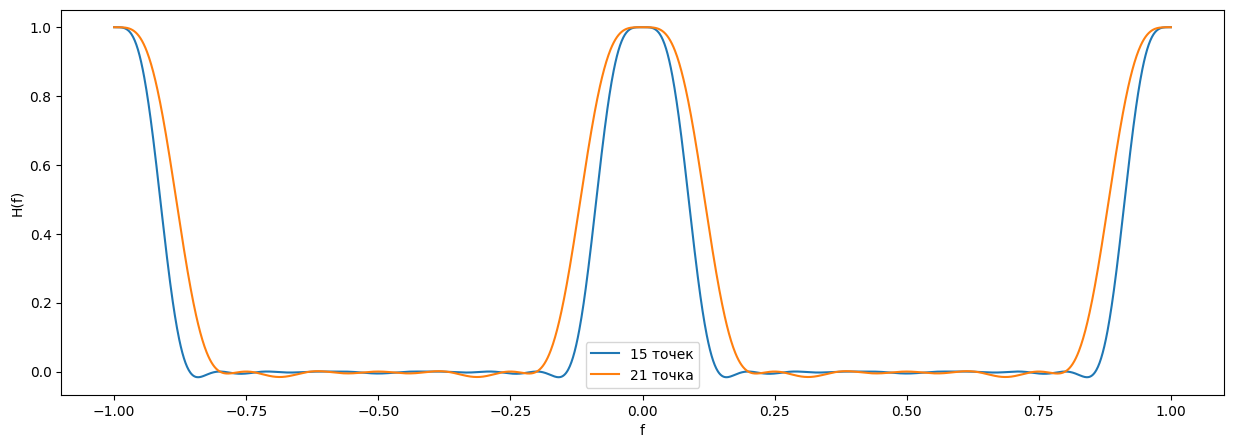

In [16]:
h_task4_15 = lambda f: 1/350 * (60 + 114*np.cos(2*np.pi*f) + 94*np.cos(4*np.pi*f) + 66*np.cos(6*np.pi*f) + 36*np.cos(8*np.pi*f) + 12*np.cos(10*np.pi*f) - 4*np.cos(12*np.pi*f) - 10*np.cos(14*np.pi*f) - 10*np.cos(16*np.pi*f) - 6*np.cos(18*np.pi*f) - 2*np.cos(20*np.pi*f))
h_task4_21 = lambda f: 1/320 * (74 + 134*np.cos(2*np.pi*f) + 92*np.cos(4*np.pi*f) + 42*np.cos(6*np.pi*f) + 6*np.cos(8*np.pi*f) - 10*np.cos(10*np.pi*f) - 12*np.cos(12*np.pi*f) - 6*np.cos(14*np.pi*f))

plt.figure(figsize=(15, 5))
plt.plot(t, h_task4_15(t), label='15 точек')
plt.plot(t, h_task4_21(t), label='21 точка')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Сильная крутизна и малая амплитуда колебаний, узкая полоса пропускания частот.

### Задание 5. Пострение графиков из предыдущих пунктов в логарифмической шкале (Дб).

Построим графики в логарифмической шкале, используя децибелы:

$$20lg\Big(\frac{|y_n|}{|s_n|}\Big) = Дб$$

Из первого пункта:

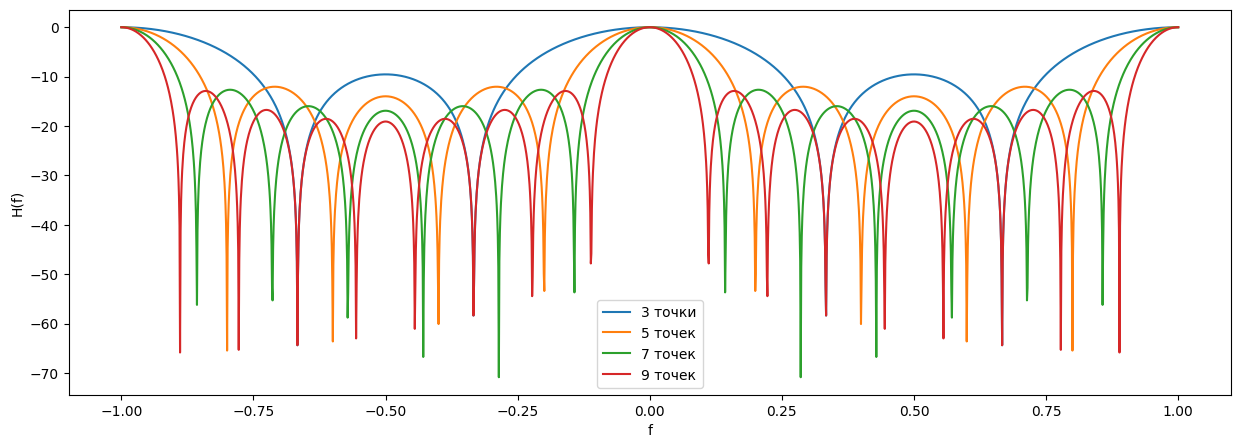

In [19]:
log = lambda f: 20*np.log10(np.abs(f))

plt.figure(figsize=(15,5))
plt.plot(t, log(h_task1(t, 3)), label='3 точки')
plt.plot(t, log(h_task1(t, 5)), label='5 точек')
plt.plot(t, log(h_task1(t, 7)), label='7 точек')
plt.plot(t, log(h_task1(t, 9)), label='9 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Из второго пункта:

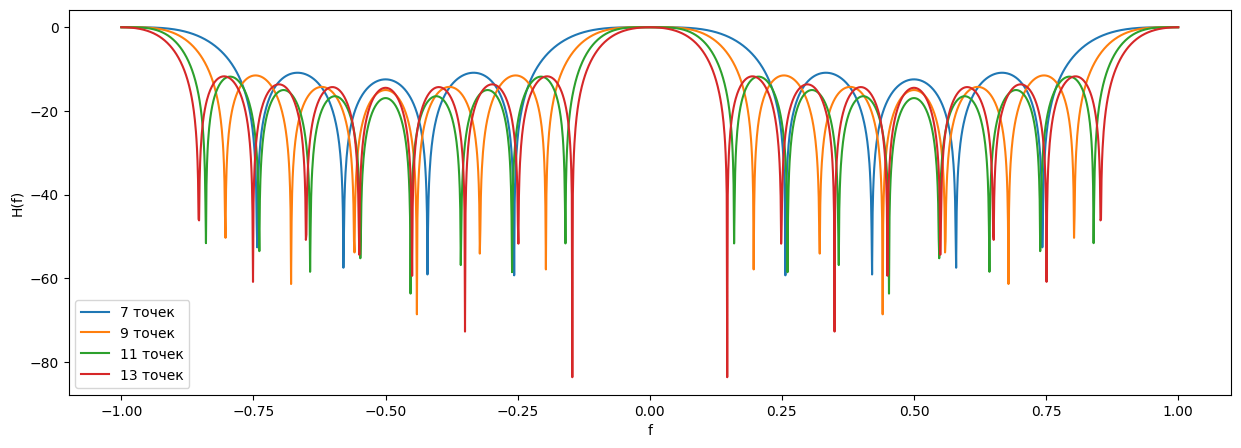

In [25]:
h_task5_7 = lambda f: 1 / 21 * (7 + 12 * np.cos(2*np.pi*f) + 6 * np.cos(4*np.pi*f) - 4 * np.cos(6*np.pi*f))
h_task5_9 = lambda f: 1 / 231 * (59 + 108 * np.cos(2*np.pi*f) + 78 * np.cos(4*np.pi*f) + 28 * np.cos(6*np.pi*f) - 42 * np.cos(8*np.pi*f))
h_task5_11 = lambda f: 1 / 429 * (89 + 168 * np.cos(2*np.pi*f) + 138 * np.cos(4*np.pi*f) + 88 * np.cos(6*np.pi*f) + 18 * np.cos(8*np.pi*f) - 72 * np.cos(10*np.pi*f))
h_task5_13 = lambda f: 1 / 143 * (25 + 48 * np.cos(2*np.pi*f) + 42 * np.cos(4*np.pi*f) + 32 * np.cos(6*np.pi*f) + 18 * np.cos(8*np.pi*f) - 22 * np.cos(10*np.pi*f))

plt.figure(figsize=(15,5))
plt.plot(t, log(h_task5_7(t)), label='7 точек')
plt.plot(t, log(h_task5_9(t)), label='9 точек')
plt.plot(t, log(h_task5_11(t)), label='11 точек')
plt.plot(t, log(h_task5_13(t)), label='13 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Из третьего пункта:

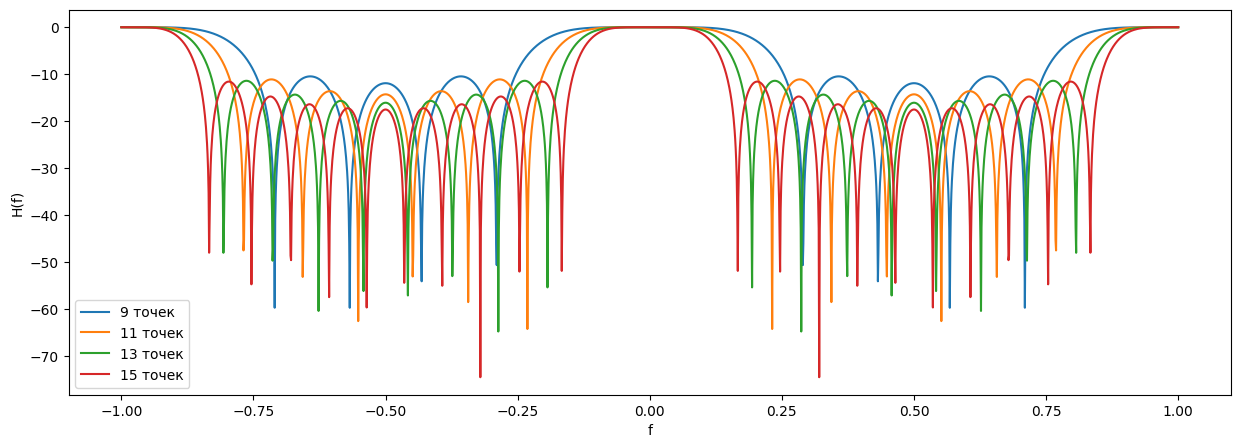

In [26]:
h_task5_9 = lambda f: 1 / 429 * (179 + 270 * np.cos(2*np.pi*f) + 60 * np.cos(4*np.pi*f) - 110 * np.cos(6*np.pi*f) + 30 * np.cos(8*np.pi*f))
h_task5_11 = lambda f: 1 / 429 * (143 + 240 * np.cos(2*np.pi*f) + 120 * np.cos(4*np.pi*f) - 20 * np.cos(6*np.pi*f) - 90 * np.cos(8*np.pi*f) + 36 * np.cos(10*np.pi*f))
h_task5_13 = lambda f: 1 / 2431 * (677 + 1200 * np.cos(2*np.pi*f) + 780 * np.cos(4*np.pi*f) + 220 * np.cos(6*np.pi*f) - 270 * np.cos(8*np.pi*f) - 396 * np.cos(10*np.pi*f) + 220 * np.cos(12*np.pi*f))
h_task5_15 = lambda f: 1 / 46189 * (11063 + 20250 * np.cos(2*np.pi*f) + 15000 * np.cos(4*np.pi*f) + 7510 * np.cos(6*np.pi*f) - 330 * np.cos(8*np.pi*f) - 5874 * np.cos(10*np.pi*f) - 5720 * np.cos(12*np.pi*f) + 4290 * np.cos(14*np.pi*f))

plt.figure(figsize=(15,5))
plt.plot(t, log(h_task5_9(t)), label='9 точек')
plt.plot(t, log(h_task5_11(t)), label='11 точек')
plt.plot(t, log(h_task5_13(t)), label='13 точек')
plt.plot(t, log(h_task5_15(t)), label='15 точек')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Из четвертого пункта:

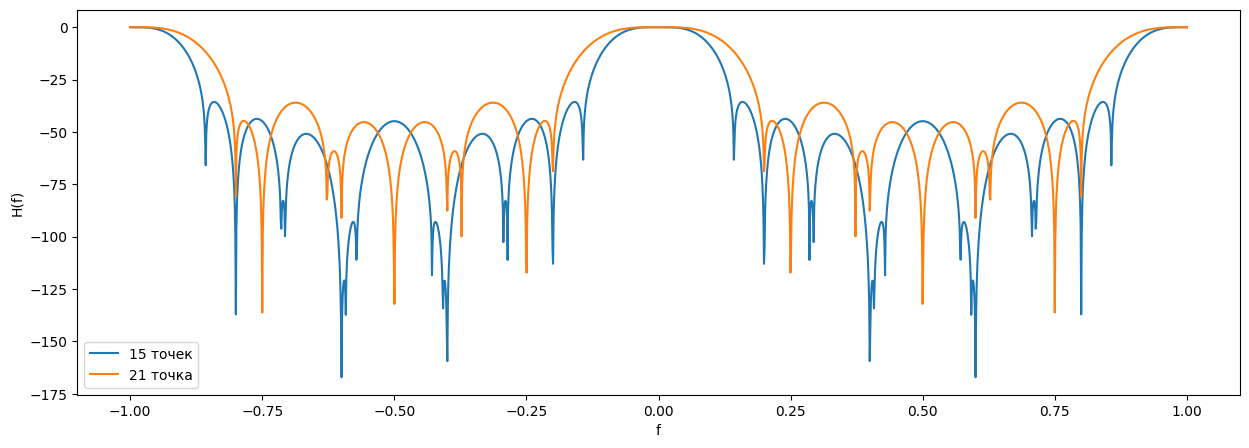

In [27]:
h_15 = lambda f: 1/350 * (60 + 114*np.cos(2*np.pi*f) + 94*np.cos(4*np.pi*f) + 66*np.cos(6*np.pi*f) + 36*np.cos(8*np.pi*f) + 12*np.cos(10*np.pi*f) - 4*np.cos(12*np.pi*f) - 10*np.cos(14*np.pi*f) - 10*np.cos(16*np.pi*f) - 6*np.cos(18*np.pi*f) - 2*np.cos(20*np.pi*f))
h_21 = lambda f: 1/320 * (74 + 134*np.cos(2*np.pi*f) + 92*np.cos(4*np.pi*f) + 42*np.cos(6*np.pi*f) + 6*np.cos(8*np.pi*f) - 10*np.cos(10*np.pi*f) - 12*np.cos(12*np.pi*f) - 6*np.cos(14*np.pi*f))

plt.figure(figsize=(15,5))
plt.plot(t, log(h_15(t)), label='15 точек')
plt.plot(t, log(h_21(t)), label='21 точка')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.show()

Логарифмическая шкала даёт больше информации которая позволяет точнее сказать о том, какие формулы сглаживания хорошо устраняют одни частоты и пропускают другие.

### Задание 6. Сопоставительный анализ свойств передаточных функций, полученных в п. 1–4.

1. Прямопропорциональная зависимость между степенью полинома, используемого для сглаживания, и зоной проспукания сигнала без искажений.
2. Прямопропорциональная зависимость между количеством точек, по которым производится сглаживание, и крутизной графика передаточной функции.
3. Обратнопропорциональная зависимость между количествм точек, по которым производится сглаживание, и амплитудой колебательных изменений.
4. Формула Спенсера обеспечивает пропускание низких частот и понижает пропускание высоких.
5. Логарифмическая шкала более информативная.
6. Во всех пунктах графики симметричны относительно 0 и повторяются с определённым периодом.


## Выводы

В процессе выполнения практической работы были выведены формулы для передаточных функций нерекурсивных фильтров, которые соответствуют полиномиальному сглаживанию дискретных сигналов различных порядков, включая использование формул Спенсера. Были построены графики H(f) и проанализированы частотные свойства передаточных функций, а также проведен сравнительный анализ частотных характеристик передаточных функций для полиномов разной степени.